In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Asus\\Desktop\\datasets\\abalone.csv")

In [3]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


* Sex is a Categorical(nominal) column and remaining seems to be continues

In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
print("No of Rows: ",df.shape[0])
print("No of columns:",df.shape[1])

No of Rows:  4177
No of columns: 9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
#Checking uniques values present in each columns
df.nunique().sort_values()

Sex                  3
Rings               28
Height              51
Diameter           111
Length             134
Viscera weight     880
Shell weight       926
Shucked weight    1515
Whole weight      2429
dtype: int64

In [8]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# Checking for zero present in dataset
df.astype(bool).sum(axis=0)

Sex               4177
Length            4177
Diameter          4177
Height            4175
Whole weight      4177
Shucked weight    4177
Viscera weight    4177
Shell weight      4177
Rings             4177
dtype: int64

There is two places at where Height is Zero. and we need to take care of it

In [10]:
# Checking for blank spaces present in dataset
(df==" ").sum(axis=0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Univariate Analysis

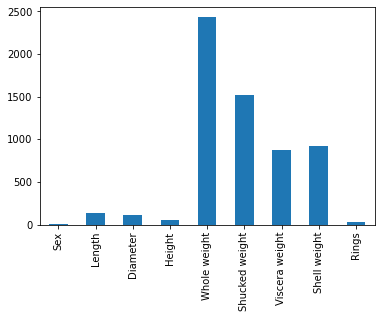

In [11]:
df.nunique().plot.bar(stacked=True)
plt.show()

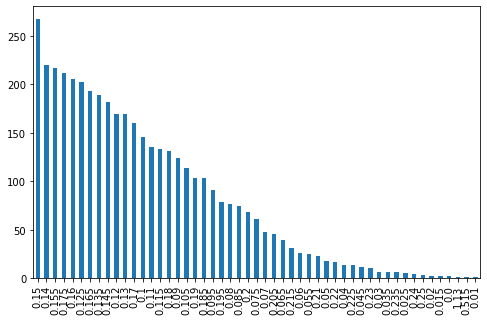

In [12]:
df["Height"].value_counts().plot.bar(figsize=(8,5))
plt.show()


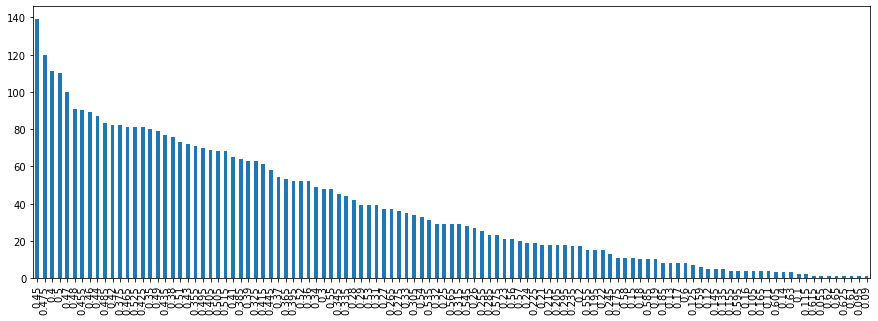

In [13]:
df["Diameter"].value_counts().plot.bar(figsize=(15,5))
plt.show()


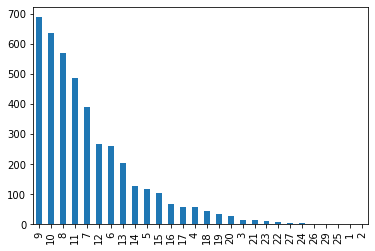

In [14]:
df["Rings"].value_counts().plot.bar()
plt.show()

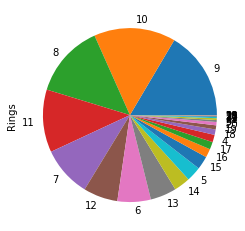

In [15]:
df["Rings"].value_counts().plot.pie()
plt.show()

In [16]:
df["Rings"].value_counts().to_frame()

,Rings
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126
5,115


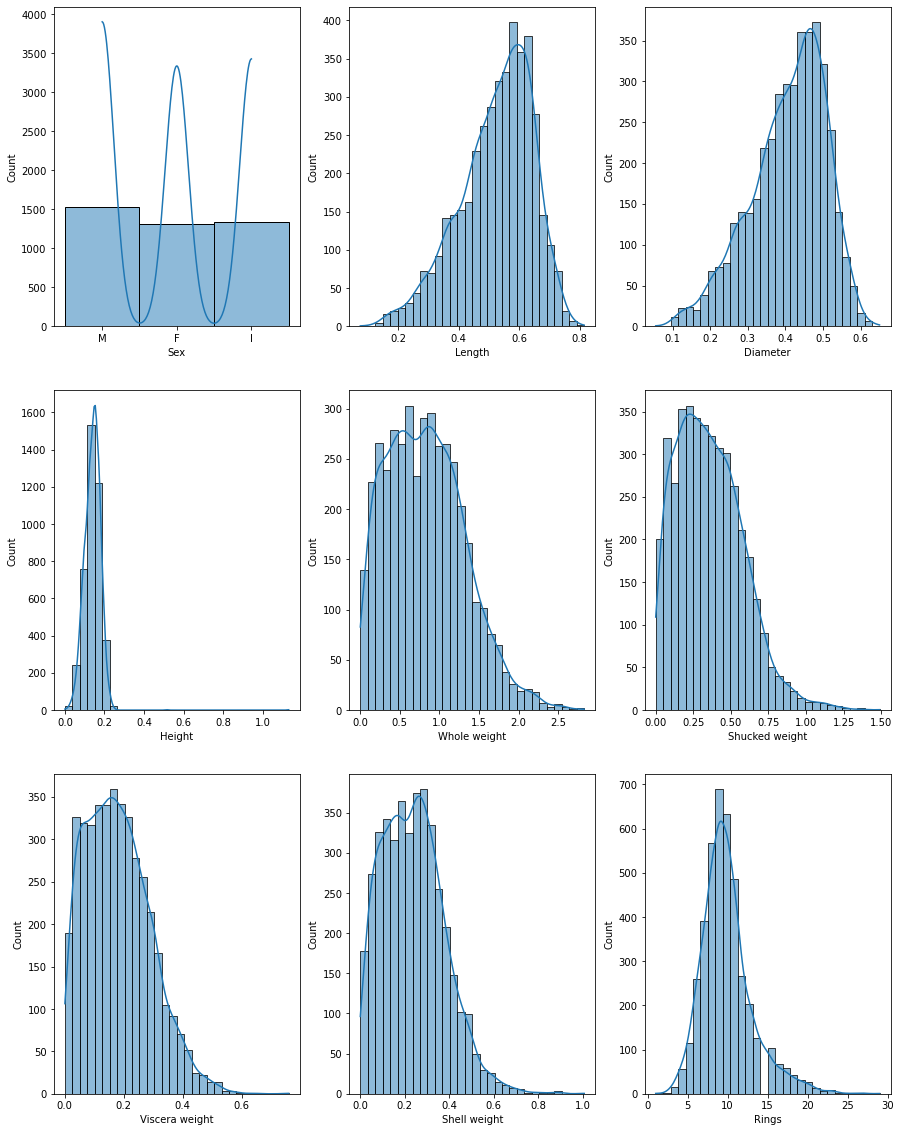

In [17]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(df[i],bins=30,kde=True)
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

<AxesSubplot:>

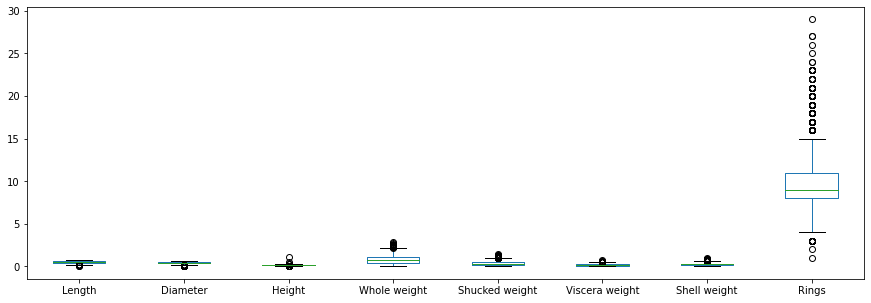

In [18]:
df.plot.box(figsize=(15,5))

## Bivariate Analysis

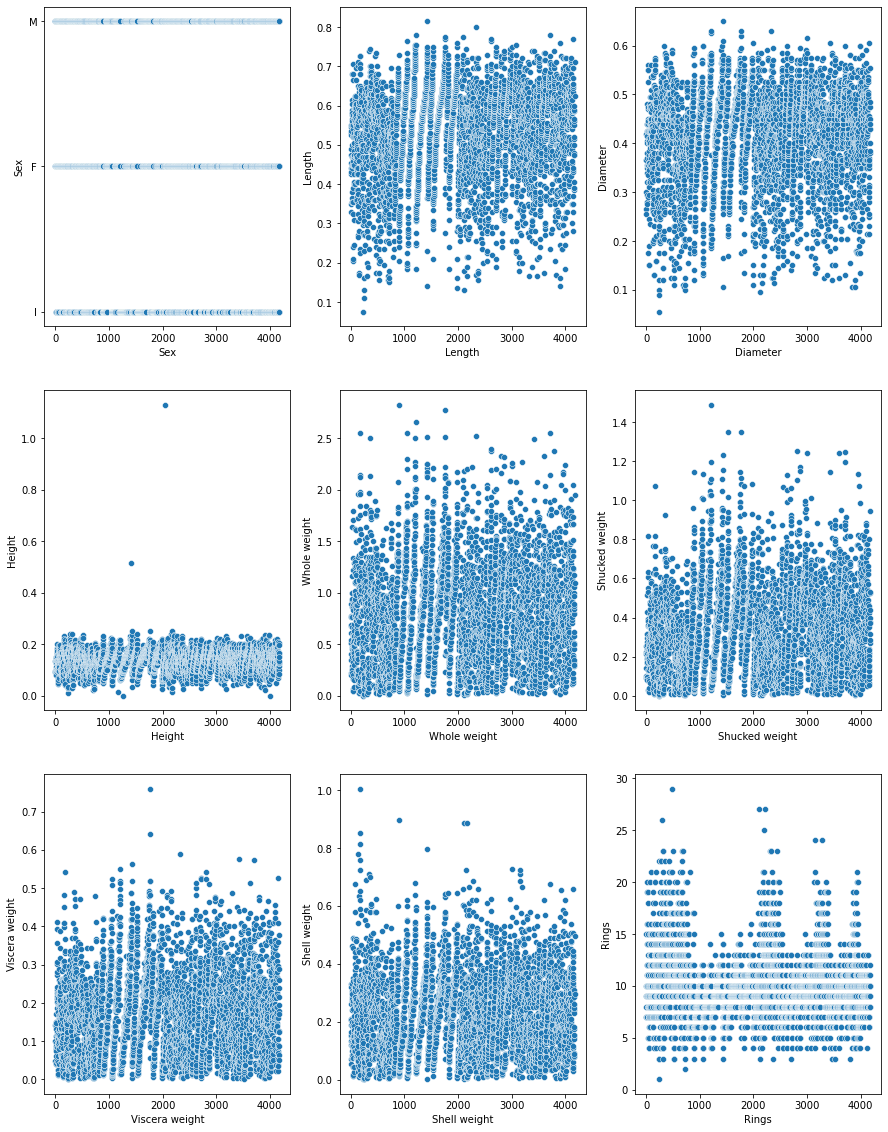

In [19]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(df.index,df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

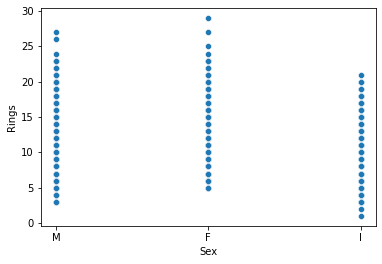

In [20]:
sns.scatterplot(df["Sex"],df["Rings"])

Seems Sex has no relation with Rings

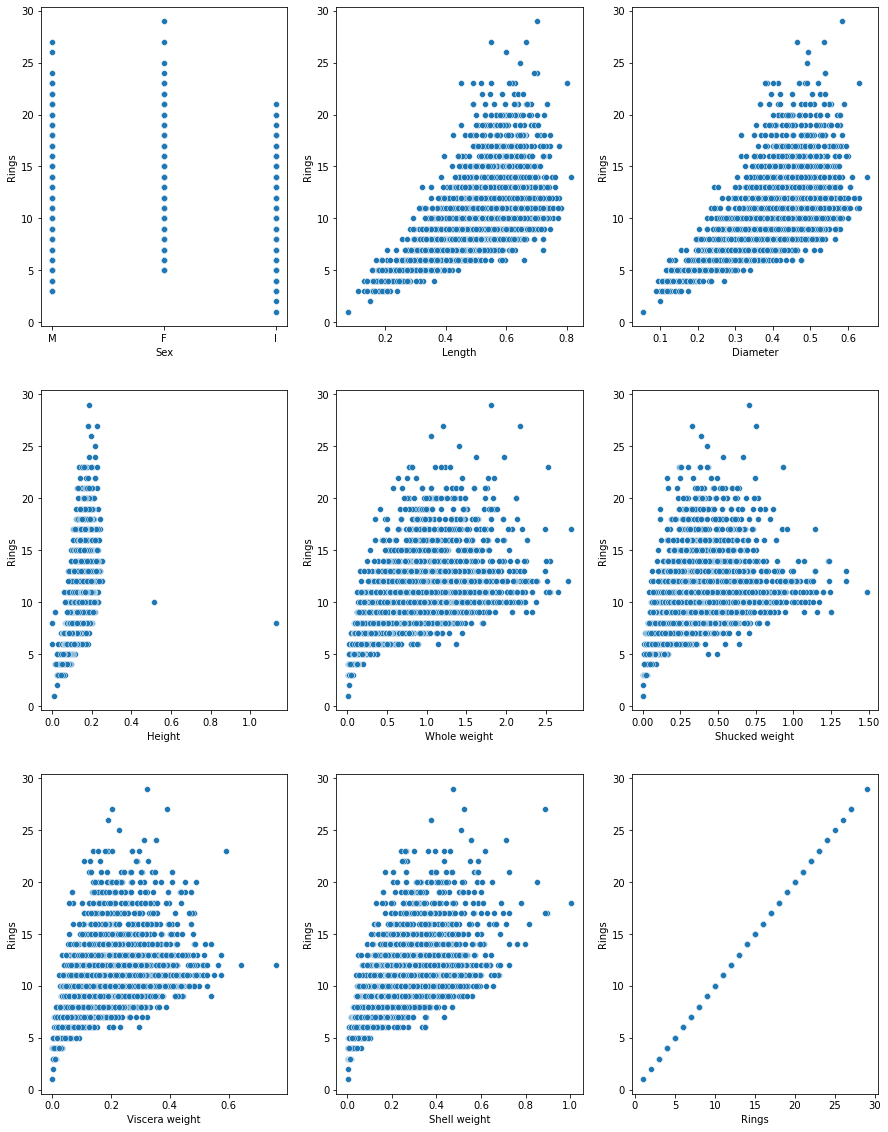

In [21]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(df[i],df["Rings"])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

From Above Graph it may seems that **Height and Sex has no relation with target column** and the two Outliers above 4 in Heights

**Before Going Any Further i need to encode the Sex column**

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df.Sex)

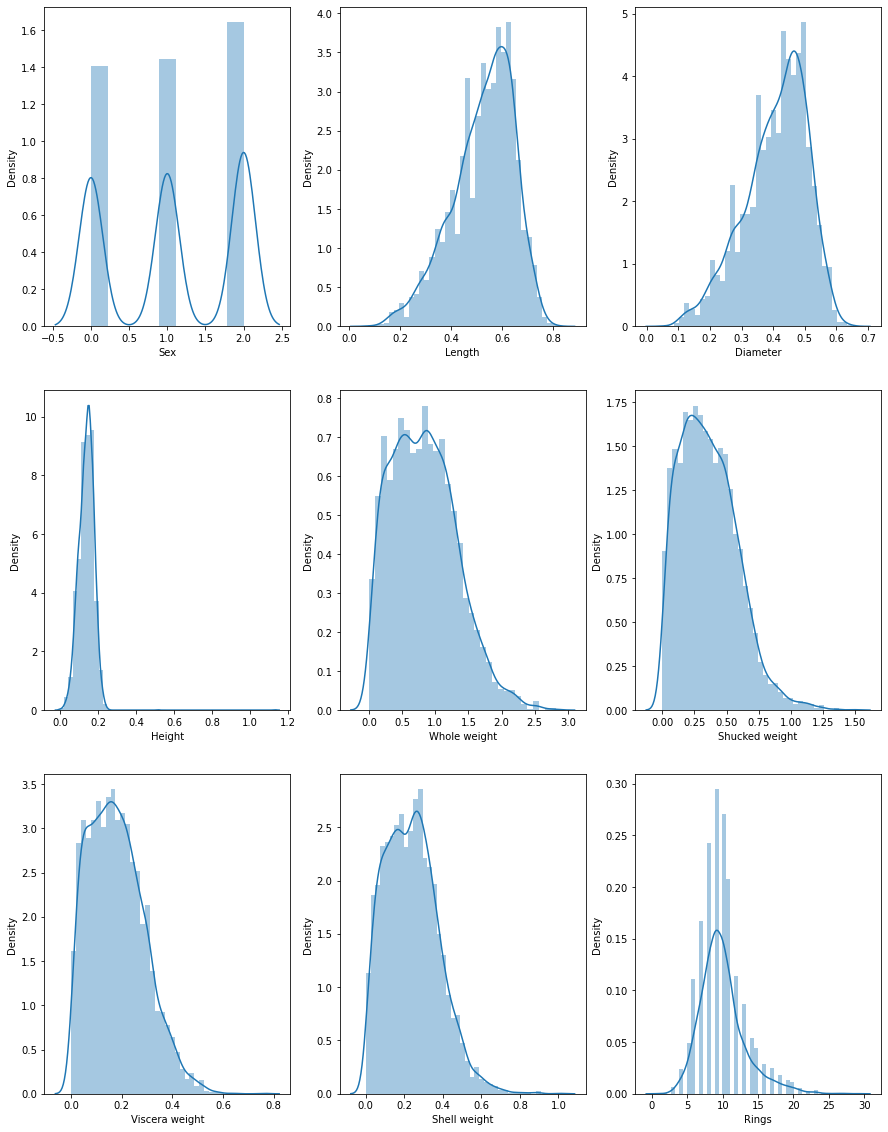

In [23]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

## Multivariate Analysis

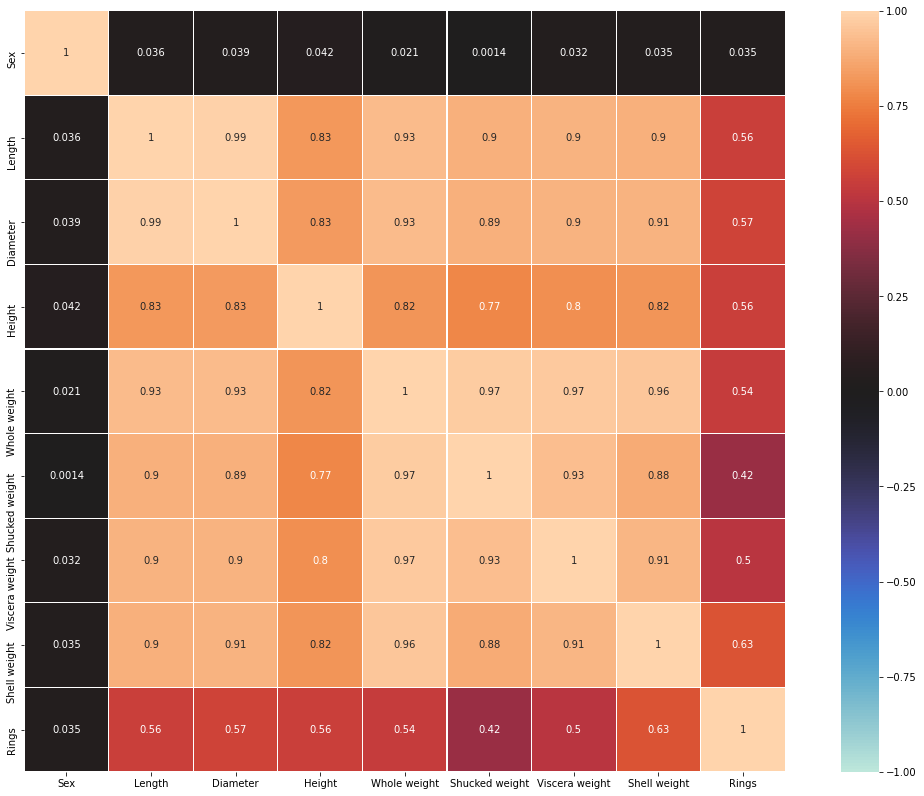

In [24]:
df_corr= df.corr().abs()
plt.figure(figsize=(20,14))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)
plt.show()

From Above Heapmap we can say that there are many Features which are strogly correlated to each other.

<AxesSubplot:xlabel='Length', ylabel='Rings'>

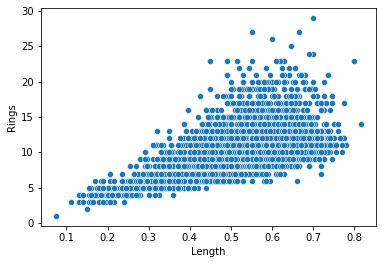

In [25]:
sns.scatterplot(df["Length"],df["Rings"])

<AxesSubplot:xlabel='Diameter', ylabel='Rings'>

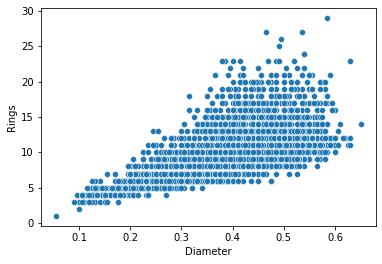

In [26]:
sns.scatterplot(df["Diameter"],df["Rings"])

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

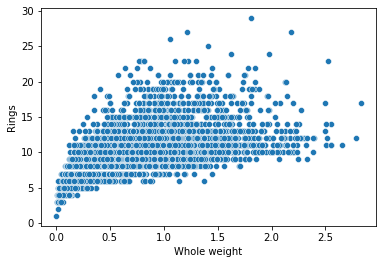

In [27]:
sns.scatterplot(df["Whole weight"],df["Rings"])

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

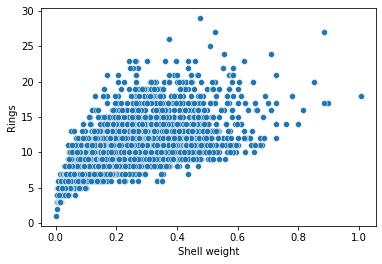

In [28]:
sns.scatterplot(df["Shell weight"],df["Rings"])

<AxesSubplot:xlabel='Height', ylabel='Rings'>

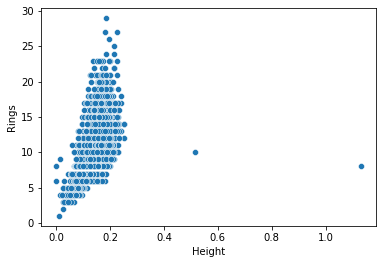

In [29]:
sns.scatterplot(df["Height"],df["Rings"])

In **Height** there is two outliers whose Height > 4

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

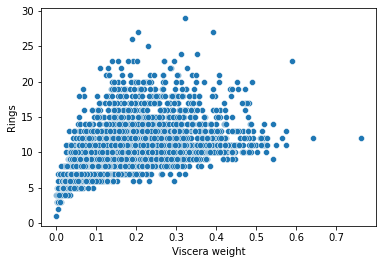

In [30]:
sns.scatterplot(df["Viscera weight"],df["Rings"])

<Figure size 1440x1008 with 0 Axes>

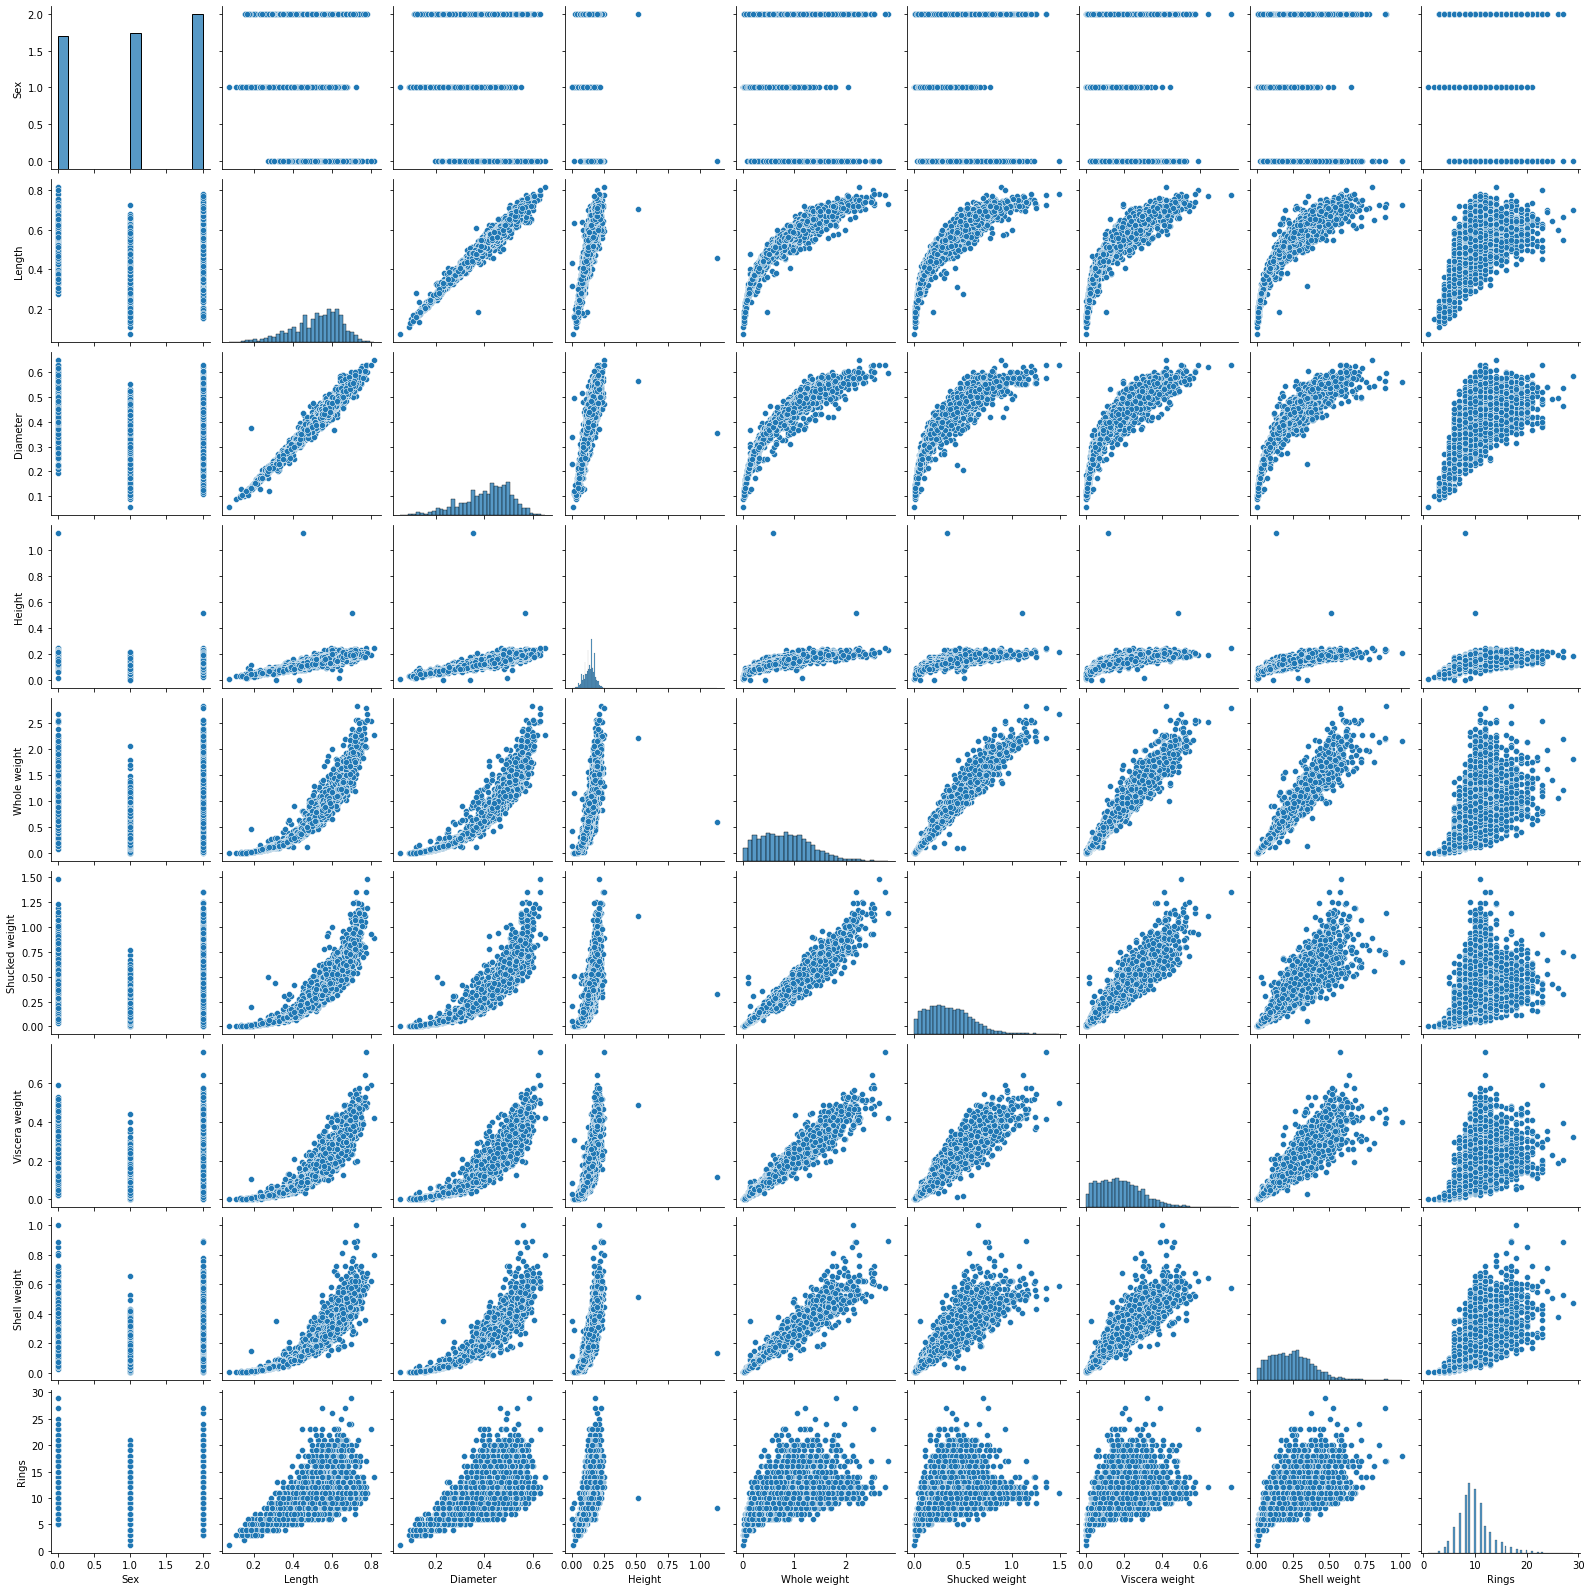

In [31]:
plt.figure(figsize=(20,14))
sns.pairplot(df)
plt.show()

In [32]:
df.corr()["Rings"].to_frame()

,Rings
Sex,-0.034627
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Rings,1.000000


### We can take only one features among who are correlation is exactly same with feature

## Data cleaning

In [33]:
# First taking care of zero value present in Height
df[df["Height"]==0]=df[df["Height"]==0].replace(0,df["Height"].mean())

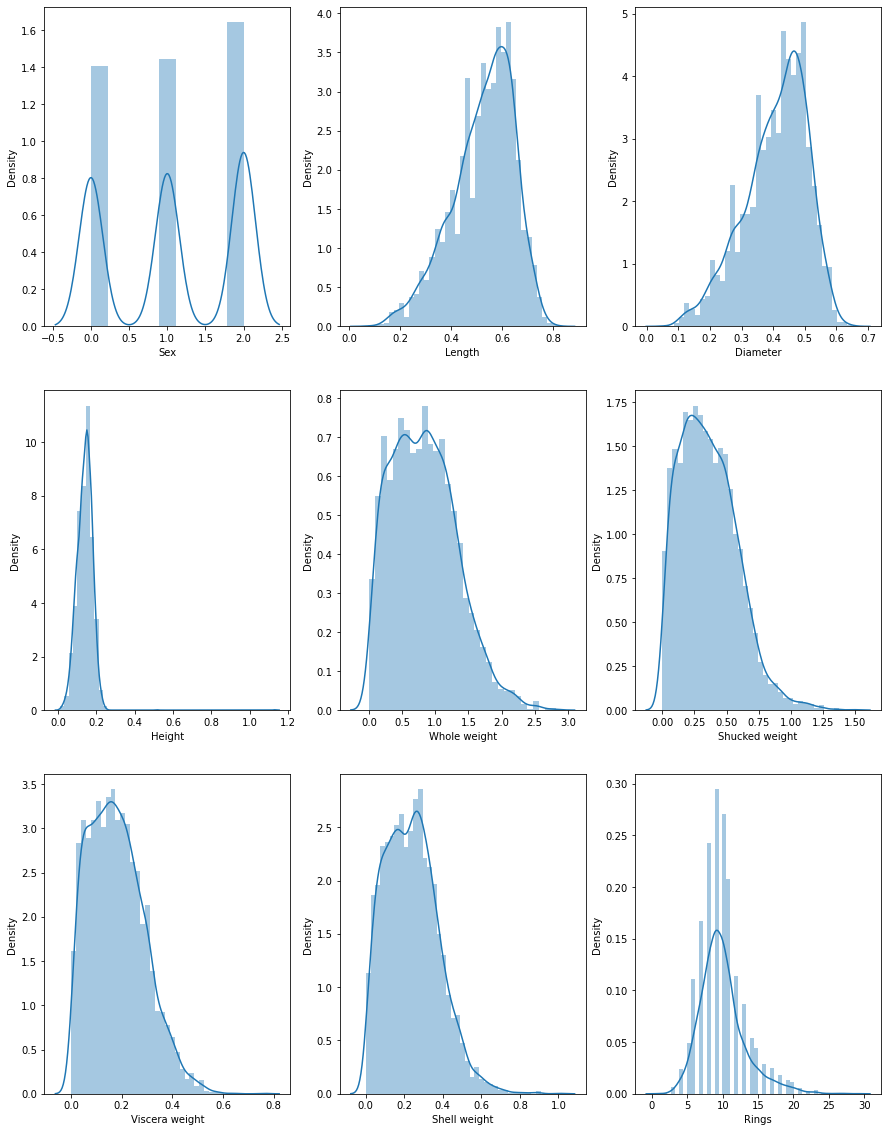

In [34]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in df:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

skewness in this features **[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']**

In [35]:
feature = [ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']

In [36]:
from scipy.stats import zscore
z_score = zscore(df[feature])

In [37]:
abs_z_score = np.abs(z_score)
filtered_entries = ((abs_z_score < 3 ) & (abs_z_score > -3 )).all(axis=1)
new_df = df[filtered_entries]
new_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [38]:
new_df.shape

(4086, 9)

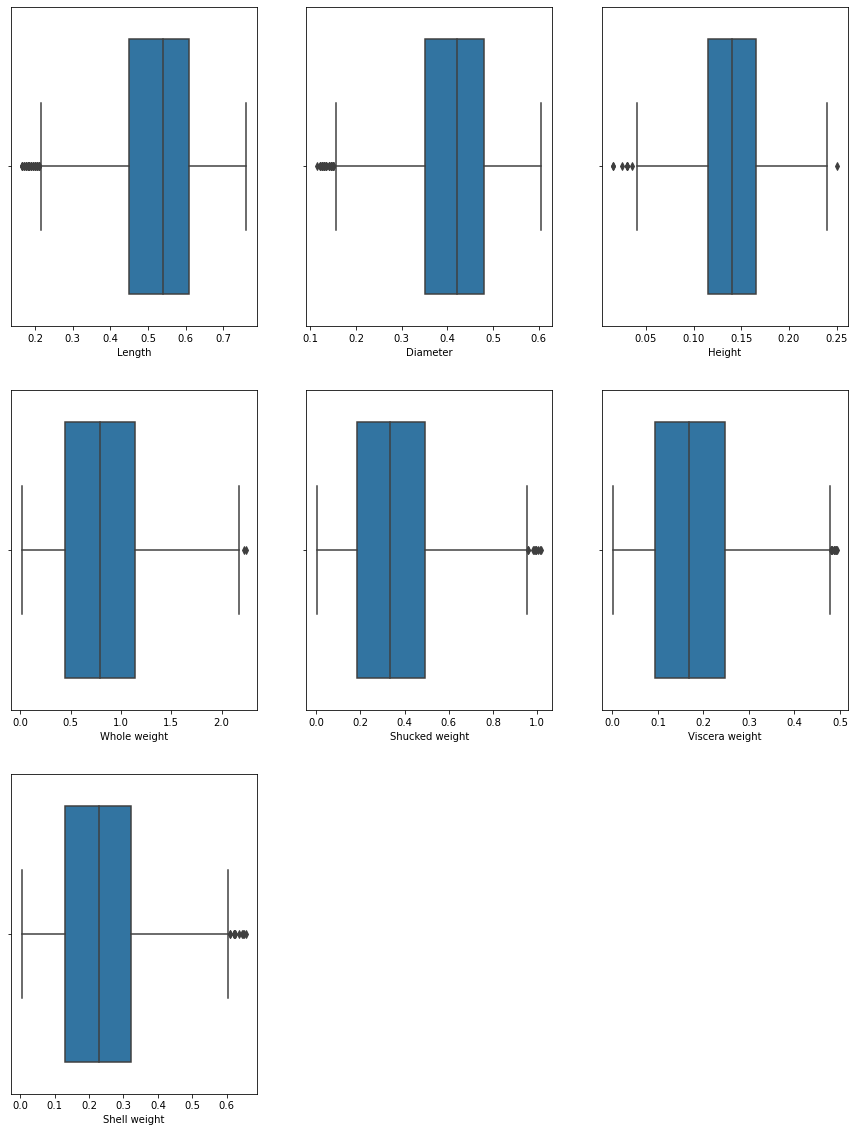

In [39]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in new_df[feature]:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

In [40]:
new_df.skew()

Sex              -0.092843
Length           -0.632676
Diameter         -0.604485
Height           -0.247292
Whole weight      0.324392
Shucked weight    0.450039
Viscera weight    0.430403
Shell weight      0.358382
Rings             1.136695
dtype: float64

In [41]:
# using interquartile method
q1 = new_df.quantile(0.25)
q3 = new_df.quantile(0.75)
iqr = q3-q1

In [42]:
for column in new_df[feature]:
    max=(q3[column]+(1.5*iqr[column]))
    index=np.where(new_df[column]>max)
    new_df.drop(new_df.index[index],inplace=True,axis=0)
new_df.shape

(4056, 9)

In [43]:
new_df.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4051,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4052,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4053,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4054,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [44]:
for column in new_df[feature]:
    min=(q1[column]-(1.5*iqr[column]))
    index=np.where(new_df[column]<min)
    new_df.drop(new_df.index[index],inplace=True,axis=0)
    new_df.reset_index()
new_df.shape

(4008, 9)

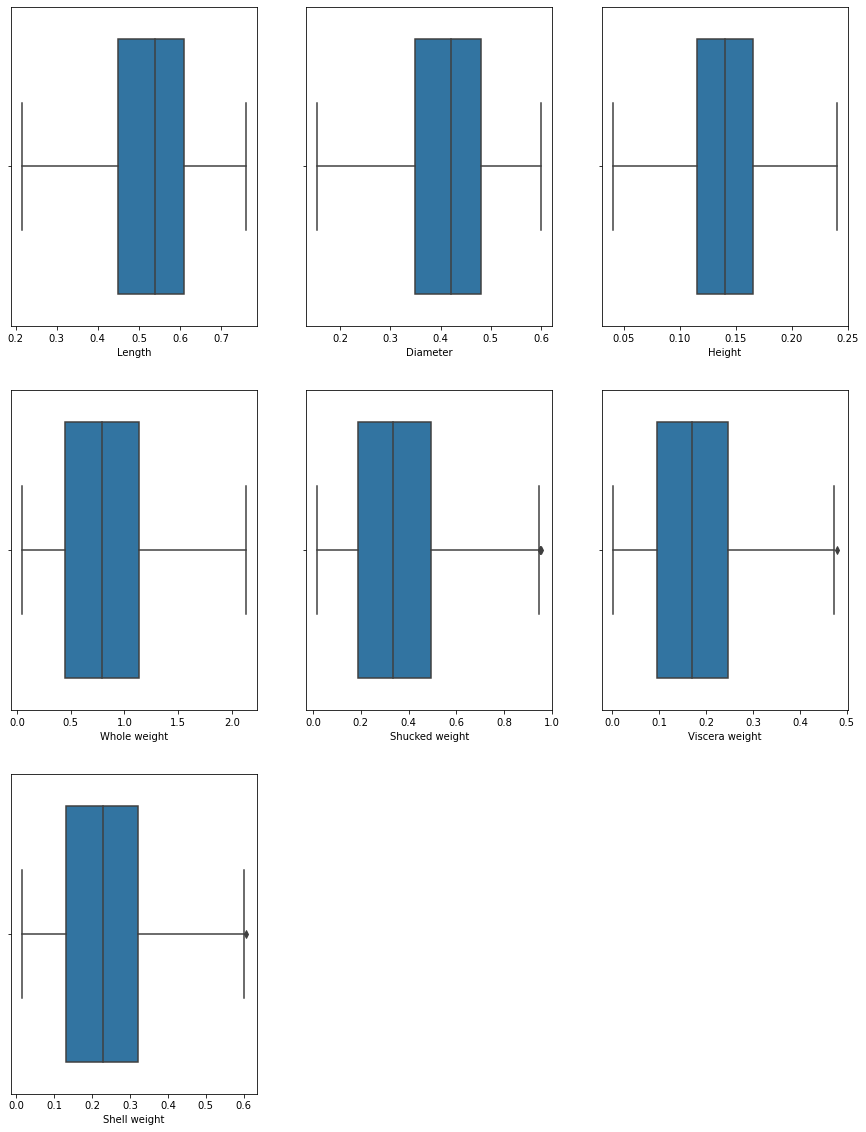

In [45]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in new_df[feature]:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

In [46]:
new_df.shape

(4008, 9)

In [47]:
new_df.skew().to_frame()

,0
Sex,-0.093042
Length,-0.536252
Diameter,-0.518461
Height,-0.176694
Whole weight,0.291144
Shucked weight,0.422620
Viscera weight,0.393499
Shell weight,0.317452
Rings,1.217791


In [48]:
loss_percentage = (df.shape[0]-new_df.shape[0])/df.shape[0]
print("Total percent of data loss",loss_percentage*100)

Total percent of data loss 4.045966004309313


I have taken care most of the Outliers using .quantile method and zscore.

In [49]:
from sklearn.preprocessing import PowerTransformer

In [50]:
scale = PowerTransformer()
new_df[feature]= scale.fit_transform(new_df[feature].values)

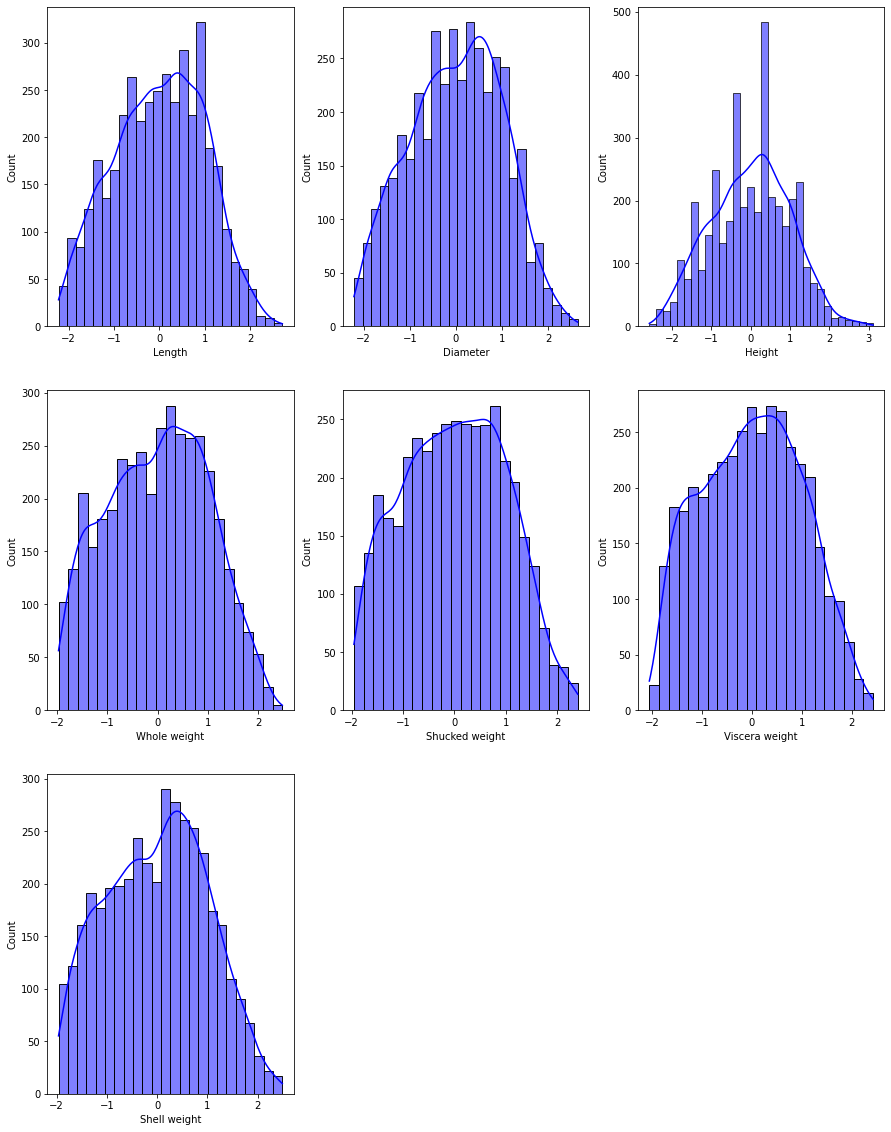

In [51]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in new_df[feature]:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(new_df[i],kde=True,color="b")
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

Dataset is more looklike a Guassian distribution

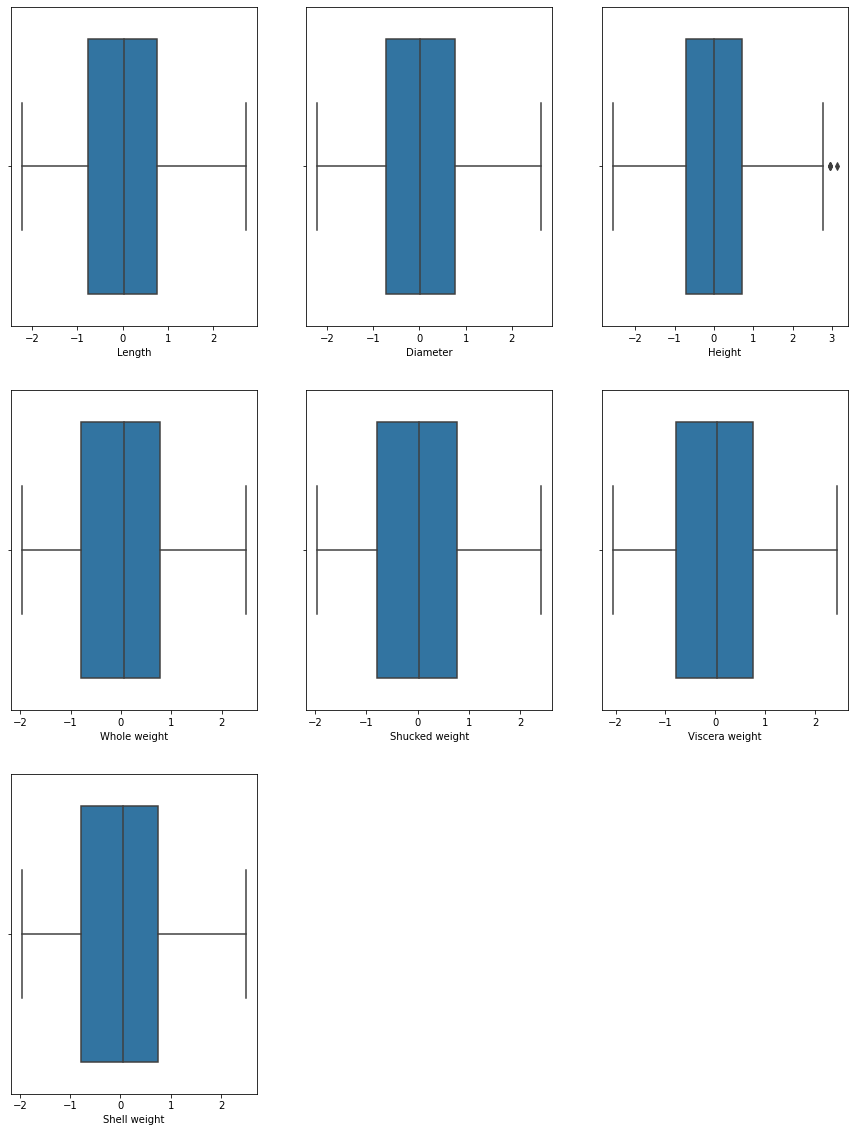

In [52]:
plotnumber = 1
plt.figure(figsize=(15,20))
for i in new_df[feature]:
    if plotnumber < 10:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(new_df[i])
        plt.xlabel(i,fontsize=10)
        plotnumber+=1
plt.show()

In [60]:
x = new_df.drop(columns=["Rings","Sex"],axis=1)
y=new_df["Rings"]

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,accuracy_score
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

In [62]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [63]:
max_accu = 0
max_RS = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    accu_score = r2_score(y_test,y_pred)
    if accu_score > max_accu:
        max_Rs = i
        max_accu = accu_score
print("Random state :",max_RS,"Best accuracy :",max_accu)

Random state : 0 Best accuracy : 0.5591684191646413


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=0)

### Linear Regression

In [65]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred= lr.predict(x_test)

In [67]:
diff=[]
r2score=[]
cross=[]
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(lr,x_scaled,y,cv=5).mean())

R2 score : 0.5212520946451159 
 cross Validation score : 0.37418749136624696


In [68]:
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(lr,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(lr,x_scaled,y,cv=5).mean())
diff.append(r-cv)

### Using Lasso and Ridge Regularization technique to check Overfitting

In [69]:
lc = LassoCV(alphas=None,max_iter=1000,normalize=True)
lc.fit(x_train,y_train)

LassoCV(normalize=True)

In [70]:
la_reg = Lasso(alpha=lc.alpha_)
la_reg.fit(x_train,y_train)
y_pred = la_reg.predict(x_test)

In [71]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(la_reg,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(la_reg,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(la_reg,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.521224049851684 
 cross Validation score : 0.3742004665365076


In [72]:
## Ridge
rid = RidgeCV(alphas=np.arange(0.0001,0.1,0.01))
rid.fit(x_train,y_train)
ridge = Ridge(alpha=rid.alpha_)
ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)

In [73]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(ridge,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(ridge,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(ridge,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.5211636508030347 
 cross Validation score : 0.3742644443699835


Lasso and Ridge score is same so we can say that there is no Overfitting in our LinearModel

### SVR

In [74]:
svc = SVR()

In [75]:
svc.fit(x_train,y_train)

SVR()

In [76]:
y_pred= svc.predict(x_test)

In [77]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(svc,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(svc,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(svc,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.4833730002912696 
 cross Validation score : 0.44341384041488074


### Gradient

In [78]:
gbr = GradientBoostingRegressor()

In [79]:
gbr.fit(x_train,y_train)
y_pred= gbr.predict(x_test)

In [80]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(gbr,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(gbr,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(gbr,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.5058156495605076 
 cross Validation score : 0.3856550694924672


### Knn

In [81]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [82]:
y_pred = knn.predict(x_test)

In [83]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(knn,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(knn,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(knn,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.42472323579243376 
 cross Validation score : 0.3029819366261936


### DecisionTree

In [84]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [85]:
y_pred = dt.predict(x_test)

In [86]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(dt,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(dt,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(dt,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.13185402917661615 
 cross Validation score : -0.20706117552379216


### BaggingRegressor

In [87]:
bag_reg= BaggingRegressor(base_estimator=lr)
bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=LinearRegression())

In [88]:
y_pred = bag_reg.predict(x_test)

In [89]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(bag_reg,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))
r = r2_score(y_test,y_pred)
cv = cross_val_score(bag_reg,x_scaled,y,cv=5).mean()
cross.append(cross_val_score(bag_reg,x_scaled,y,cv=5).mean())
diff.append(r-cv)

R2 score : 0.5193795011413345 
 cross Validation score : 0.372900598746429


In [90]:
model = ["LinearRegression","Lasso","Ridge","SVR","GradientBoostingRegressor","KNeighborsRegressor","DecisionTreeRegressor",
        "BaggingRegressor"]

In [91]:
Before= pd.DataFrame({"Model":model,
                   "R2 score":r2score,
                   "Cross validation score":cross,
                   "Difference":diff})
Before

,Model,R2 score,Cross validation score,Difference
0,LinearRegression,0.521252,0.374187,0.147065
1,Lasso,0.521224,0.374200,0.147024
2,Ridge,0.521164,0.374264,0.146899
3,SVR,0.483373,0.443414,0.039959
4,GradientBoostingRegressor,0.505816,0.386137,0.120861
5,KNeighborsRegressor,0.424723,0.302982,0.121741
6,DecisionTreeRegressor,0.131854,-0.232590,0.365202
7,BaggingRegressor,0.519380,0.374547,0.146643


**I have tried the Model building on Uncleaned dataset as well and here is the accuracy and cv score i got**
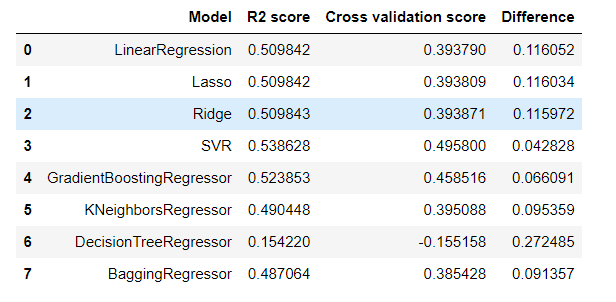

And also tried to remove columns like Sex and Diameter and check the model paramter as well there is not much difference in accuracy so i am keeping all the columns again and rerunning all the above cells 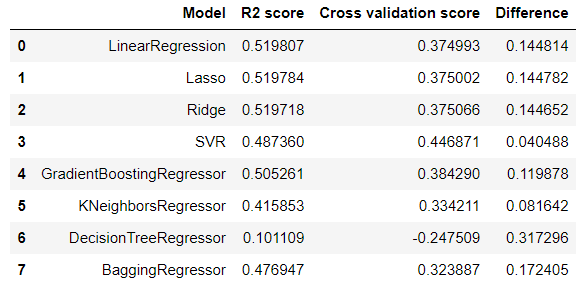

## Hyperparameter tunning

In [249]:
params = {"kernel":["linear", "poly", "rbf", "sigmoid"],
         
          "C":[1,10,3,9,5,6,20,22,25,26,27,30,23,24,12,15,16,17,18],
          "epsilon":[0.10,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
          "degree":[3,4,5,6,10,12,14,15,16,18,19,20],
          "verbose":[True,False],
          "gamma":[0.0001,0.0001,.001,.01,1],
          "tol":[0.001,0.0001,0.1,0.01],
          "shrinking":[True,False],
          "coef0":[0,2,5,1,8,6,10,4,7,12,15,16,17,18,19],
          "max_iter":list(range(100,1000,200)),
          }

In [237]:
rand_search = RandomizedSearchCV(svc,param_distributions=params,cv=5)

In [244]:
rand_search.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=5,
                   estimator=SVR(C=10, coef0=4, degree=18, epsilon=0.8,
                                 max_iter=500, shrinking=False),
                   param_distributions={'C': [1, 10, 3, 9, 5, 6, 20, 22, 25, 26,
                                              27, 30, 23, 24, 12, 15, 16, 17,
                                              18],
                                        'coef0': [0, 2, 5, 1, 8, 6, 10, 4, 7,
                                                  12, 15, 16, 17, 18, 19],
                                        'degree': [3, 4, 5, 6, 10, 12, 14, 15,
                                                   16, 18, 19, 20],
                                        'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                    0.6, 0.7, 0.8],
                                        'gamma': [0.0001, 0.0001, 0.001, 0.01,
                                                  1],
                                        'kernel': 

In [245]:
rand_search.best_params_

{'verbose': False,
 'tol': 0.001,
 'shrinking': False,
 'max_iter': 700,
 'kernel': 'rbf',
 'gamma': 0.01,
 'epsilon': 0.5,
 'degree': 19,
 'coef0': 5,
 'C': 3}

In [275]:
svc = SVR(verbose=False,tol=0.01,shrinking=False,max_iter=300,kernel="rbf",gamma=1,epsilon=0.3,degree=14,coef0=17,C=3)

In [276]:
svc.fit(x_train,y_train)

SVR(C=3, coef0=17, degree=14, epsilon=0.3, gamma=1, max_iter=300,
    shrinking=False, tol=0.01)

In [277]:
y_pred = svc.predict(x_test)

In [278]:
print("R2 score :",r2_score(y_test,y_pred),"\n","="*60,"\n","cross Validation score :",cross_val_score(bag_reg,x_scaled,y,cv=5).mean())
r2score.append(r2_score(y_test,y_pred))

R2 score : 0.471560385096921 
 cross Validation score : 0.37395280310039203


Tuned using RandomizedSearchCV that's why may be we did not get best parameters

## Saving the Model

In [235]:
import pickle

# save the model to disk

filename = 'Abolane_case.pk1'
pickle.dump(svc, open(filename, 'wb'))

In [236]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
